<a href="https://colab.research.google.com/github/Young-Dong/nlp/blob/main/nlp100_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**第4章: 形態素解析**

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）を[MeCab](https://taku910.github.io/mecab/)を使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
! lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [ ]:
! sudo apt install mecab
! sudo apt install libmecab-dev
! sudo apt install mecab-ipadic-utf8
# ! pip install MeCab

In [3]:
!wget https://nlp100.github.io/data/neko.txt
!mecab -o ./neko.txt.mecab ./neko.txt

--2021-11-11 00:17:52--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.01s   

2021-11-11 00:17:52 (89.1 MB/s) - ‘neko.txt’ saved [975789/975789]



**30. 形態素解析結果の読み込み**

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
import pandas as pd
from io import StringIO

with open('neko.txt.mecab') as f:
  mecab = f.read().replace('\t',',')

df = pd.read_csv(StringIO(mecab), sep=',', header=None)
neko = [{'surface':df.iloc[i][0],
        'base':df.iloc[i][7], 
        'pos':df.iloc[i][1], 
        'pos1':df.iloc[i][2]}
        for i in range(df.shape[0])]

print(len(neko))

226266


In [5]:
neko

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': nan},
 {'base': nan, 'pos': nan, 'pos1': nan, 'surface': 'EOS'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': nan},
 {'base': nan, 'pos': nan, 'pos1': nan, 'surface': 'EOS'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': nan},
 {'base': nan, 'pos': nan, 'pos1': nan, 'surface': 'EOS'},
 {'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '

**31. 動詞**

動詞の表層形をすべて抽出せよ．

In [6]:
verb = set()
for i in neko:
  if i['pos'] == '動詞':
    verb.add(i['surface'])
print(len(verb))

3893


In [7]:
verb

{'伺わ',
 '言い兼ね',
 '惜しめ',
 '振り返っ',
 'こん',
 '支え',
 '行きゃ',
 '追付こ',
 '心付か',
 '訪う',
 '続か',
 '濡れ',
 '這入ら',
 '澄まし',
 '告げる',
 '這う',
 '聞き合わせ',
 '盗ん',
 '持て余し',
 '破っ',
 '忍び込ん',
 '降らせる',
 'こたえる',
 'いただか',
 'もぐれ',
 '聴い',
 '講ずる',
 '上げよ',
 '噛ま',
 '書き立て',
 '通ずる',
 '成し',
 '追え',
 'ほ',
 '流行り',
 '吐い',
 '打ち殺し',
 '逐っ',
 '伺えれ',
 '欠け',
 '抛り出し',
 'きつける',
 '飛ぶ',
 '弾か',
 '開け',
 'たべ',
 'よる',
 'わか',
 '練り',
 'なげ',
 '話す',
 'ごろつい',
 '通そ',
 '飲み下し',
 '強い',
 '対し',
 '取りはずす',
 '敲く',
 '譲っ',
 'ぬから',
 '習い',
 '飛び上がる',
 '焼い',
 '振っ',
 '着か',
 '弾け',
 '通り',
 '有ん',
 '睨みつける',
 '飛び上がろ',
 '暮らさ',
 'だまる',
 'しつけ',
 '見計らっ',
 '嵌め',
 '待ち兼ね',
 '食わせれ',
 '掻き',
 '推せ',
 'ずれ',
 '来る',
 '誂える',
 '押しつけ',
 '仰向き',
 'ぶら下がっ',
 '作る',
 'すむ',
 '祟り',
 '磨け',
 'くれろ',
 '気が付く',
 '顧みる',
 '滅すれ',
 '這入ん',
 '見合せよ',
 '抱く',
 '教え',
 '躍ら',
 '滑',
 '折ら',
 'やり',
 '与っ',
 '知る',
 '尋ね',
 'かわし',
 '舞い戻っ',
 '混ぜ',
 '買い込ん',
 '刈り',
 '分け',
 '問わ',
 '躍る',
 '言い',
 '凝らす',
 '構っ',
 '登る',
 '被る',
 '勝っ',
 '訴える',
 '寝そべっ',
 'からまっ',
 '見棄て',
 '合わし',
 '出合っ',
 'れりゃ',
 'のしかかっ',
 'いただく',
 '流す',
 '弄する',

**32. 動詞の基本形**

動詞の基本形をすべて抽出せよ．

In [8]:
verb_base = set()
for i in neko:
  if i['pos'] == '動詞':
    verb_base.add(i['base'])
print(len(verb_base))

2300


In [9]:
verb_base

{'揃う',
 '振り落とす',
 '訪う',
 'ねぼける',
 '敗れる',
 '震わせる',
 '告げる',
 '売り捌く',
 '這う',
 '飲み下す',
 '産まれる',
 '残す',
 '降らせる',
 'こたえる',
 '講ずる',
 '通ずる',
 '見送る',
 '巻き込む',
 'きつける',
 '飛ぶ',
 'よる',
 '煙る',
 '話す',
 '記す',
 '敲く',
 '取りはずす',
 '飛び上がる',
 'だまる',
 '睨みつける',
 '停る',
 '呼びつける',
 '燻る',
 '歌う',
 'したがう',
 '坐り込む',
 '引きずり出す',
 '来る',
 '誂える',
 'ぶらさがる',
 '作る',
 'すむ',
 'ききつける',
 '気が付く',
 '顧みる',
 '抱く',
 '転がれる',
 'いざる',
 '繋ぐ',
 '知る',
 '生じる',
 '振り撒く',
 '尽す',
 '躍る',
 '飛込む',
 '登る',
 '凝らす',
 '被る',
 '積み込む',
 '訴える',
 '綯う',
 '仕損じる',
 'いただく',
 '気づかう',
 'はれる',
 '流す',
 '弄する',
 '駆る',
 '待ち合せる',
 'つかまる',
 '見詰める',
 '逢う',
 '寝込む',
 '散る',
 'なく',
 '沈む',
 'のぼる',
 'じゃらす',
 '奉る',
 'さる',
 'すわる',
 '膨れる',
 'やむ',
 'なる',
 '瘠せる',
 '繰返す',
 '擦る',
 'しつくす',
 'さます',
 'たでる',
 '略する',
 '凹む',
 '湧く',
 '教わる',
 '集る',
 '怠る',
 '逃げる',
 'ある',
 'かこつ',
 '振い落す',
 '問いかける',
 '代える',
 '追い込む',
 '飛び降りる',
 '頬張る',
 '暴く',
 '除く',
 '瞬く',
 '経つ',
 '破る',
 '寄り添う',
 'つけ込む',
 '弾く',
 '判ずる',
 '張れる',
 'まう',
 '見廻す',
 '死ぬ',
 '消す',
 '砕ける',
 '追いかける',
 '下る',
 '解せる',
 '休む',
 '覚ます',
 'しゃくう',

**33. 「AのB」**

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [10]:
neko.index(i)

2

In [11]:
a_no_b = set()
for j in range(len(neko)):
  if neko[j]['surface'] == 'の' and neko[j-1]['pos'] == '名詞' and neko[j+1]['pos'] == '名詞':
    a_no_b.add(neko[j-1]['surface'] + neko[j]['surface'] + neko[j+1]['surface'])
print(len(a_no_b))

4924


In [12]:
a_no_b

{'合のもの',
 '伯父の伯父',
 '狂の寄り',
 '千金の春宵',
 '境の壁',
 'ベーコンの格言',
 '台所の廂',
 '行脚の衲僧',
 '台所の十',
 '向島の阿部',
 '馬鹿の前',
 '先生の頭',
 '一文の価値',
 '白の帆',
 'Agnodiceの逸話',
 '三の迷惑',
 '円の収入',
 '次の句',
 '金田の妻',
 '不思議のよう',
 '裏の池',
 '文明の不平',
 '当人の腹',
 '婦人の礼服',
 '毛の字',
 '自己の邸',
 '華厳の滝',
 '会社の方',
 'クリーサスの富',
 '利口のよう',
 '稀代の品物',
 '等の他',
 '自分の箸',
 '敬服の至り',
 '書籍の価値',
 '最明寺の御馳走',
 '猫の習癖',
 '外套の下',
 '羽織の紐',
 'そこの下女',
 '主人の主人',
 '乾の方角',
 '普通の人類',
 '内の想像',
 '町の下宿',
 '純粋の模',
 '寸の上',
 '身内の筋肉',
 '人間の膝',
 '一の条件',
 '迷亭の話',
 '同一の事実',
 '何の罪',
 '巻煙草の吸い殻',
 '迷亭の眼中',
 '父祖の罪悪',
 '彼等の大胆',
 '船の中',
 '口の贅沢',
 '爪の先',
 '事の非',
 '江の水',
 '手桶の間',
 '雁の味',
 '明治の御代',
 '庚申山の裾',
 '手の付け',
 '臘のお話',
 '君の不平',
 '腰障子の破れ',
 '襖の蔭',
 'ぐるの栄',
 '白の時代',
 '的の修養',
 '迷亭の鋭鋒',
 '人間の糟',
 '家の話',
 '棒鱈のよう',
 '吾輩の力量',
 '奥の部屋',
 '安の股引',
 '霊の気',
 '背中の方',
 '健全の人間',
 '吾輩の鼻',
 'あとの句',
 '臨時の気',
 '溝の中',
 'こっちの肩',
 '例の尻尾',
 '何の因果',
 '二つの者',
 'ヴァルカンの子',
 '倫理の代り',
 '命懸けの商',
 '人類の地球',
 '天気の日曜',
 '表の窮措大',
 '軽蔑の極',
 '主人の寝室',
 '虎の事',
 '秋の始め',
 '人の身の上',
 'さの球',
 '顔の中心',
 '衣服の歴史',
 '黒白の

**34. 名詞の連接**


名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [13]:
# 名詞であると後ろは名詞であるかを識別し、連続名詞数をcountする
nouns = []
max_counts = 0
for i in range(len(neko)):
  if neko[i]['pos'] == '名詞':
    nouns_counts = 0
    for j in range(len(neko)-1):
      if neko[i+j]['pos'] == '名詞':
        nouns_counts += 1
      else:
        break
      if nouns_counts >= max_counts:
        max_counts = nouns_counts
        nouns.append({'noun_no':i, 'noun_counts':nouns_counts})

In [14]:
# 最大値のnoとlengthを抽出
longest_nouns_no = []
for i in range(len(nouns)):
  if nouns[i]['noun_counts'] == max_counts:
    longest_nouns_no.append(nouns[i]['noun_no'])

In [15]:
# 文字の抽出
longest_nouns = []
for i in longest_nouns_no:
  tmp = ''
  for j in range(max_counts):
    tmp += neko[i+j]['surface']
  longest_nouns.append(tmp)
print(len(longest_nouns))

2


In [16]:
longest_nouns

["manyaslip'twixtthecupandthelip", '明治三十八年何月何日戸締り']

**35. 単語の出現頻度**

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [17]:
df_word = df[(df.iloc[:][1]!='記号') & (df.iloc[:][0]!='EOS')]
df_word[0].value_counts()

の     9194
て     6868
は     6420
に     6243
を     6071
      ... 
戦勝       1
堂々       1
ささ       1
しそ       1
伺わ       1
Name: 0, Length: 13559, dtype: int64

**36. 頻度上位10語**

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
! pip install japanize_matplotlib

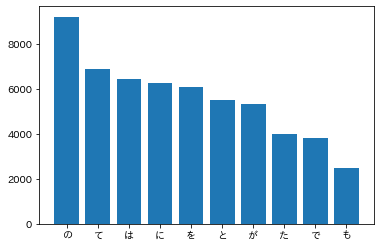

In [19]:
import matplotlib.pyplot as plt
import japanize_matplotlib

df_plt = df_word[0].value_counts().head(10)
plt.bar(df_plt.index, df_plt.values)
plt.show()

**37. 「猫」と共起頻度の高い上位10語**

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

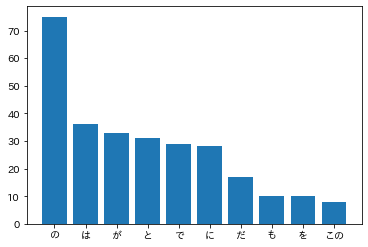

In [20]:
# 猫の行の抽出
df_cat_around = pd.concat([df_word[df_word.iloc[:][0].shift(-1)=='猫'], df_word[df_word.iloc[:][0].shift(1)=='猫']])
df_plt_cat = df_cat_around[0].value_counts().head(10)
plt.bar(df_plt_cat.index, df_plt_cat.values)
plt.show()

**38. ヒストグラム**

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

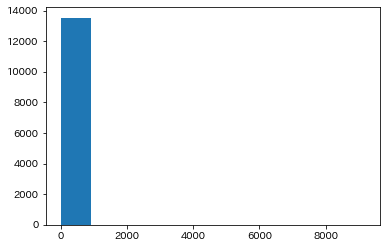

In [21]:
df_plt = df_word[0].value_counts()
plt.hist(df_plt.values)
plt.show()

**39. Zipfの法則**

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

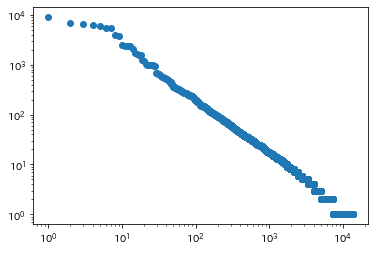

In [22]:
df_plt = df_word[0].value_counts()
plt.scatter(range(1, len(df_plt)+1), df_plt.values)
plt.xscale('log')
plt.yscale('log')
plt.show()